<a href="https://colab.research.google.com/github/Constanza234/EDP-1/blob/main/M%C3%ADnimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Mínimos Cuadrados

Considere el problema de valor inicial
$$u'' + u = x
$$
con condiciones $u(0)=0 \text{ y } u'(0)=2 $

Nuevamente encuentre una solución aproximada de la forma
$$
u_N = \alpha_0 + \alpha_1 x + \alpha_2 x^2 + \alpha_3 x^3 + \cdots
$$
pero ahora use el método de mínimos cuadrados para encontrar una solución aproximada.


Solución Analítica

In [694]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [695]:
x, a, b = sp.symbols('x a b')
u = sp.Function('u')

In [696]:
ode= u(x).diff(x, 2) + u(x) - x
ode
sp.dsolve(ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [697]:
sol = sp.dsolve(ode, ics={u(0): 0, u(x).diff(x).subs(x, 0): 2})
sol

Eq(u(x), x + sin(x))

In [698]:
sol

Eq(u(x), x + sin(x))

In [699]:
u_exprt = sol.rhs #parte derecha de sol

u_num = sp.lambdify(x, u_exprt, "numpy") # Se redefine como arreglo

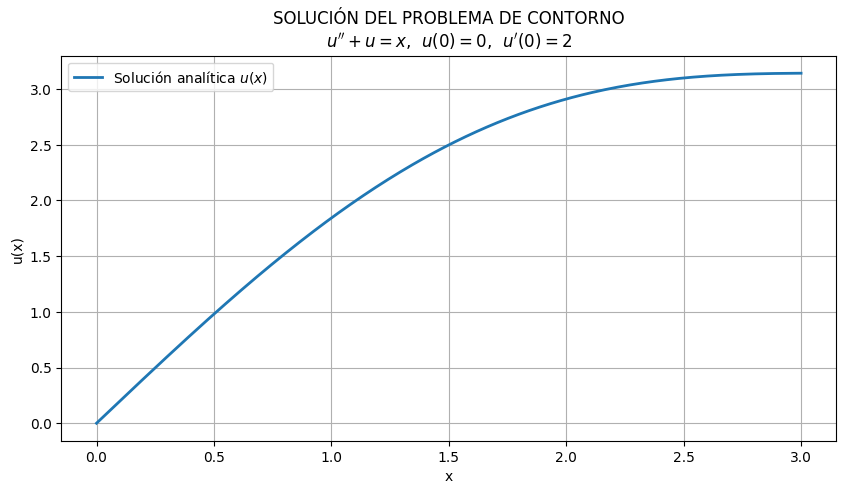

In [700]:
xx = np.linspace(0, 3, 400)
yy = u_num(xx)

plt.figure(figsize=(10,5))
plt.plot(xx, yy, label='Solución analítica $u(x)$', linewidth=2)
plt.title("SOLUCIÓN DEL PROBLEMA DE CONTORNO\n$u'' + u = x$,  $u(0)=0$,  $u'(0)=2$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

Solución Numérica

In [701]:
x = sp.symbols('x')
u = sp.Function('u')

In [702]:
a, b = sp.symbols('a b')

#FUNCIÓN DE PRUEBA u_n(x) que cumple con las condiciones iniciales
u_n = 2*x + a*x**2 + b*x**3

In [703]:
#Segunda derivada
u_n_2 = sp.diff(u_n, x, 2)
u_n_2

2*(a + 3*b*x)

In [704]:
# Residuo del ejercicio: u'' + u = x
E = u_n_2 + u_n - x
E

a*x**2 + b*x**3 + x + 2*(a + 3*b*x)

In [705]:
E.simplify()

a*x**2 + 2*a + b*x**3 + 6*b*x + x

In [706]:
# Integral del residuo al cuadrado
I = sp.integrate(E**2, (x, 0, 1))
I

83*a**2/15 + 49*a*b/3 + 5*a/2 + 509*b**2/35 + 22*b/5 + 1/3

In [707]:
dIa = sp.diff(I, a)
dIb =sp.diff(I, b)

In [708]:
print(dIa, "\n", dIb)


166*a/15 + 49*b/3 + 5/2 
 49*a/3 + 1018*b/35 + 22/5


In [709]:
#Resolvemos para a y para b (alfas)
soleq = sp.solve([dIa, dIb], [a, b], simplify=True)
soleq

{a: -1335/86789, b: -24759/173578}

In [710]:
#Sustituimos a y b en la función de prueba
u_approx = u_n.subs(soleq)
u_approx

-24759*x**3/173578 - 1335*x**2/86789 + 2*x

In [711]:
u_approx

-24759*x**3/173578 - 1335*x**2/86789 + 2*x

In [712]:
#Convertir en Función Numérica
u_approx_fn = sp.lambdify(x, u_approx, "numpy")

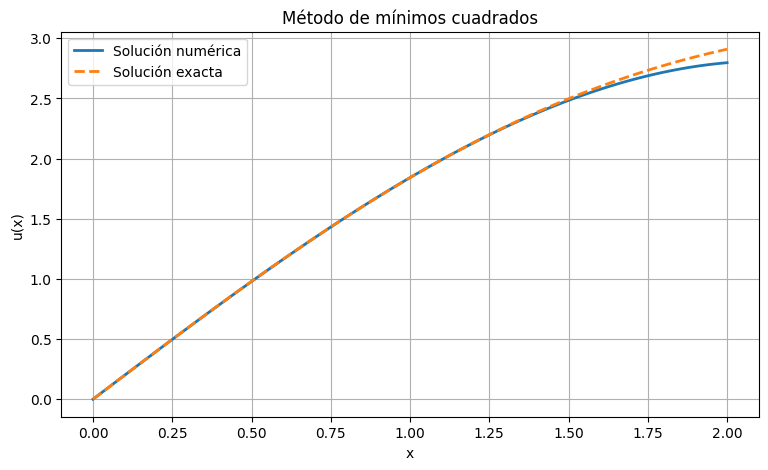

In [713]:
xx = np.linspace(0, 2, 100)

plt.figure(figsize=(9,5))
plt.plot(xx, u_approx_fn(xx), label="Solución numérica", linewidth=2)
plt.plot(xx, u_num(xx), "--", label="Solución exacta", linewidth=2)

plt.title("Método de mínimos cuadrados")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

Observamos la solución del mismo ejercicio resuelto con el método por colocación, y concluimos que el método de mínimos cuadrados nos da una mejor aproximación, esto es visible tanto en la solución como en la gráfica final de ambos códigos, puesto que aunque en los dos métodos las gráficas se parecen mucho, hay una lijera mejoría en este método.